#####  OM NAMO NARAYANA

# FIFA20 Dataset Analysis

In [1]:
import matplotlib as mpl

themes = {'gruvboxd':{
    'font_color':'white', 'background_color': '#1d2021', 'primary_color':'#282828', 'secondary_color':'#cc241d'}
}

my_palette = themes['gruvboxd']
COLOR = my_palette['font_color']
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.facecolor'] = my_palette['primary_color'] 
mpl.rcParams['figure.facecolor'] = my_palette['primary_color'] 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In F:\OS\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\OS\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\OS\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In F:\OS\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\OS\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam

### Data cleaning
Remove the unnecessary or irrelevant data

In [3]:
file_path = 'D:/Machine-Learning/datasets/fifa20/players_15.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
for col in df.head(2):
    print(col, ':', df[col].iloc[0], type(df[col].iloc[0]))
df=df.drop(['player_url', 'long_name', 'short_name', 'player_traits', 'player_tags', 'dob', 'joined'], axis=1)
print(df.head(2))

sofifa_id : 158023 <class 'numpy.int64'>
player_url : https://sofifa.com/player/158023/lionel-messi/15/157759 <class 'str'>
short_name : L. Messi <class 'str'>
long_name : Lionel Andrés Messi Cuccittini <class 'str'>
age : 27 <class 'numpy.int64'>
dob : 1987-06-24 <class 'str'>
height_cm : 169 <class 'numpy.int64'>
weight_kg : 67 <class 'numpy.int64'>
nationality : Argentina <class 'str'>
club : FC Barcelona <class 'str'>
overall : 93 <class 'numpy.int64'>
potential : 95 <class 'numpy.int64'>
value_eur : 0 <class 'numpy.int64'>
wage_eur : 0 <class 'numpy.int64'>
player_positions : CF <class 'str'>
preferred_foot : Left <class 'str'>
international_reputation : 5 <class 'numpy.int64'>
weak_foot : 3 <class 'numpy.int64'>
skill_moves : 4 <class 'numpy.int64'>
work_rate : Medium/Low <class 'str'>
body_type : Normal <class 'str'>
real_face : Yes <class 'str'>
release_clause_eur : nan <class 'numpy.float64'>
player_tags : #Speedster, #Dribbler, #FK Specialist, #Acrobat, #Clinical Finisher, #C

### Data preprocessing
Convert string into bool or one-hot encoding according to the values

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import re
import seaborn as sns
from sklearn.impute import SimpleImputer

In [5]:
def check_category(df, column):
    x = df[column][0]
    if(type(x)!=str):
        return type(x)
    else:
        contains_num=False
        for ch in x:
            if(ch.isdigit()):
                contains_num=True
                break
        if(contains_num):
            try:
                y = list(map(float, re.split('\+|\-|\,\t', x)))
                return 'int_str'
            except:
                return 'others'
        else:
            return 'str'

In [6]:
def label_dataset(df, column):
    values = df[column].unique()
    encoder = LabelEncoder().fit(values)
    distribution = df[column].value_counts().sort_index()
    decoder=dict()
    for key, value in zip(encoder.transform(values), values):
        decoder[key]=values
    return encoder, decoder, values, distribution

In [7]:
def int_exp(df, column):
    default_nan = [np.nan for i in list(map(int, re.split('\+|\-|\,', df[column][0])))]
    res =  [list(map(float, re.split('\+|\-|\,\t', val))) if(type(val)==str) else default_nan for val in df[column]]
    l = 1
    for r in res:
        l = max(l, len(r))
    for i, r in enumerate(res):
        res[i] += [float("nan")]*(l-len(res[i]))
    return np.transpose(res)

In [8]:
print(int_exp(df, 'attacking_finishing'))

[[94. 95. 85. ... 24. 25. 36.]
 [ 3.  3.  2. ... nan nan nan]]


In [9]:
class preprocessData():
    def __init__(self, df):
#         self.df=pd.read_csv(path)
        self.df=df
        self.coltype=[check_category(self.df, x) for x in self.df.columns]
        self.encoder = dict()
        self.decoder= dict()
        self.values = dict()
        self.distribution = dict()
        print(self.coltype)
        for ctype, col in zip(self.coltype, self.df.columns):
            if(ctype=='str'):
                print(f'{col} has encoder')
                self.encoder[col],  self.decoder[col], self.values[col], self.distribution[col]=label_dataset(self.df, col)
                self.df[col] = self.encoder[col].transform(self.df[col])
            elif(ctype=='int_str'):
                vals = int_exp(self.df, col)
                for i, val in enumerate(vals):
                    self.df[col+'_'+str(i)]=val
                self.df=(self.df).drop(col, axis=1)
            else:
                print(col)
                try:
                    self.df[col].fillna(float(df[col].mean()), inplace=True)
                except:
                    None



In [10]:
x = preprocessData(df)
processed_df = x.df
print(processed_df)

[<class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, 'str', 'str', <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, 'str', 'str', <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, 'str', 'str', 'str', <class 'numpy.float64'>, 'str', <class 'numpy.float64'>, <class 'float'>, <class 'numpy.float64'>, 'str', <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'int_str', 'i

In [11]:
for col in processed_df.head(0):
    print(col, ':', processed_df[col].iloc[0], type(processed_df[col].iloc[0]))

sofifa_id : 158023 <class 'numpy.int64'>
age : 27 <class 'numpy.int64'>
height_cm : 169 <class 'numpy.int64'>
weight_kg : 67 <class 'numpy.int64'>
nationality : 4 <class 'numpy.int32'>
club : 195 <class 'numpy.int32'>
overall : 93 <class 'numpy.int64'>
potential : 95 <class 'numpy.int64'>
value_eur : 0 <class 'numpy.int64'>
wage_eur : 0 <class 'numpy.int64'>
player_positions : 196 <class 'numpy.int32'>
preferred_foot : 0 <class 'numpy.int32'>
international_reputation : 5 <class 'numpy.int64'>
weak_foot : 3 <class 'numpy.int64'>
skill_moves : 4 <class 'numpy.int64'>
work_rate : 7 <class 'numpy.int32'>
body_type : 1 <class 'numpy.int32'>
real_face : 1 <class 'numpy.int32'>
release_clause_eur : nan <class 'numpy.float64'>
team_position : 3 <class 'numpy.int32'>
team_jersey_number : 10.0 <class 'numpy.float64'>
loaned_from : nan <class 'float'>
contract_valid_until : 2018.0 <class 'numpy.float64'>
nation_position : 3 <class 'numpy.int32'>
nation_jersey_number : 10.0 <class 'numpy.float64'>

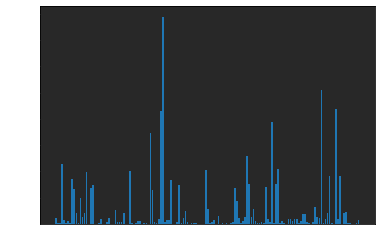

In [12]:
encoder, values, distribution = x.encoder['nationality'], x.values['nationality'], x.distribution['nationality']
plt.bar(encoder.transform(values), distribution)
plt.show()

## DataVisualization


In [13]:
import seaborn as sns

corr = processed_df.fillna(0).drop(columns=['sofifa_id', 'nationality', 'club']).corr()
print(corr)

                age  height_cm  weight_kg   overall  potential  value_eur  \
age        1.000000   0.084419   0.211907  0.436108  -0.071597        NaN   
height_cm  0.084419   1.000000   0.766069  0.050320   0.014681        NaN   
weight_kg  0.211907   0.766069   1.000000  0.124379   0.016278        NaN   
overall    0.436108   0.050320   0.124379  1.000000   0.805234        NaN   
potential -0.071597   0.014681   0.016278  0.805234   1.000000        NaN   
...             ...        ...        ...       ...        ...        ...   
cb_1       0.097625   0.011391   0.022374  0.297720   0.262871        NaN   
rcb_0      0.102946  -0.160944  -0.142525  0.262067   0.193840        NaN   
rcb_1      0.097625   0.011391   0.022374  0.297720   0.262871        NaN   
rb_0       0.083541  -0.250506  -0.227195  0.286394   0.228144        NaN   
rb_1       0.097625   0.011391   0.022374  0.297720   0.262871        NaN   

           wage_eur  player_positions  preferred_foot  \
age             Na

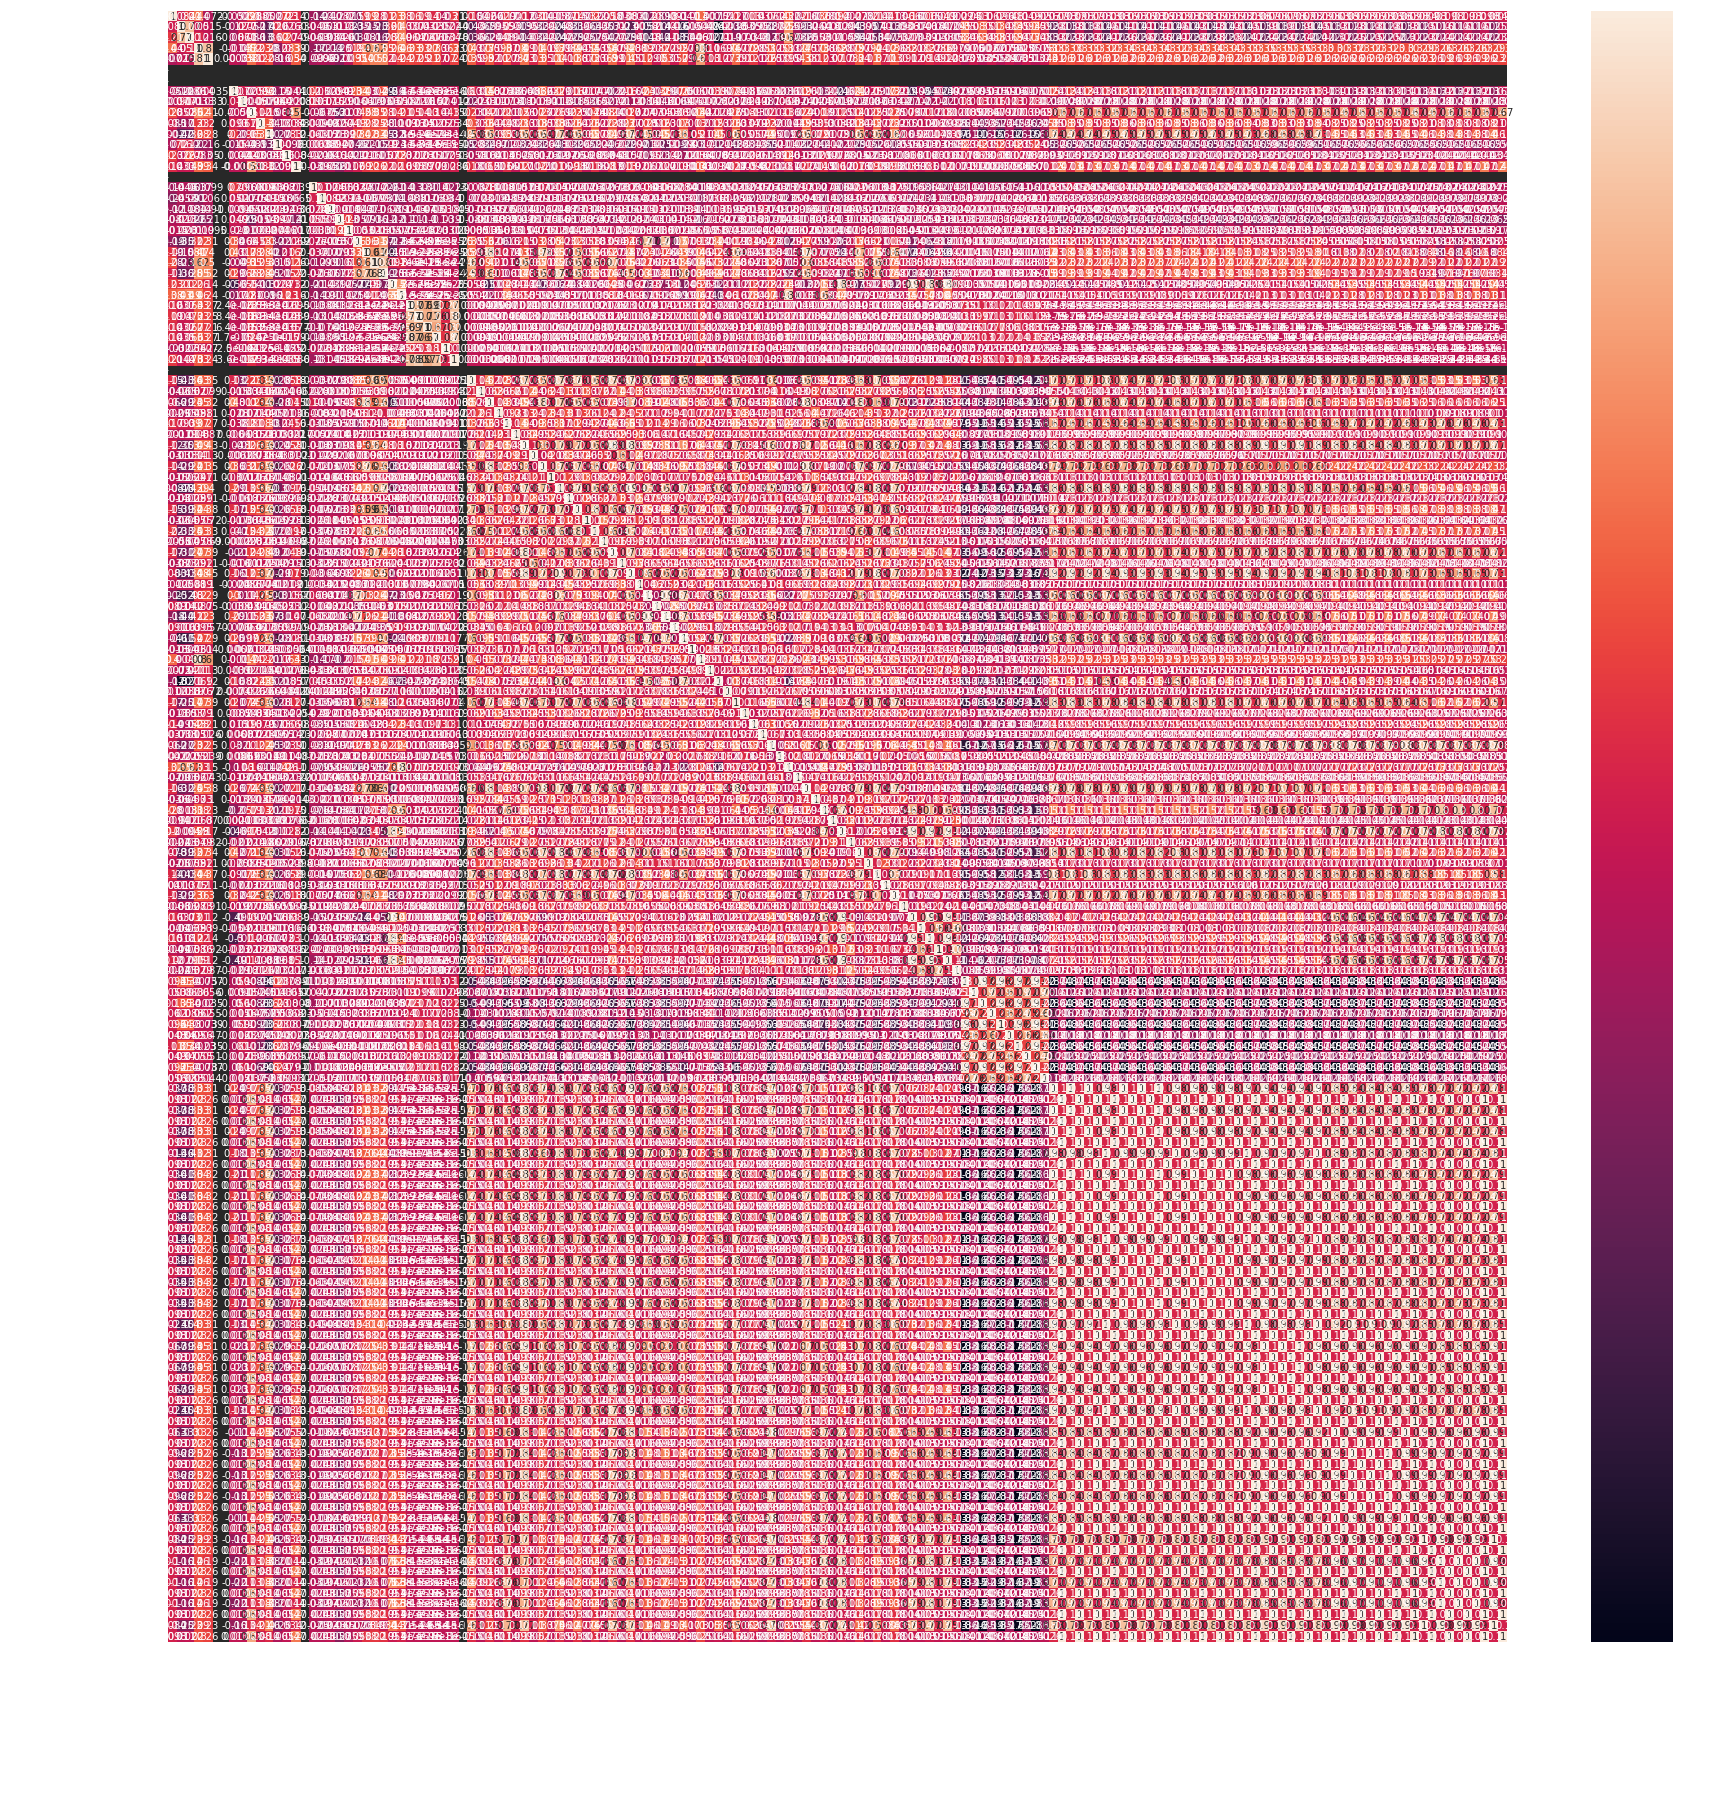

In [14]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.show()

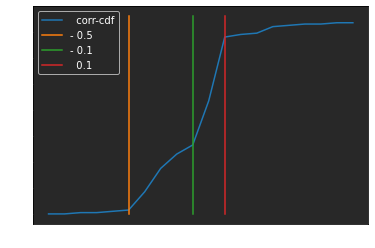

In [15]:
h_corr = []
x = [0.1*i -1 for i in range(20)]
for i in x:
    h = corr['height_cm']<i
    h_corr.append(corr['height_cm'].where(h).notnull().sum())
vertical_line = [8* i for i in range(len(x))]

plt.plot(x, h_corr)
plt.plot([-0.5]*len(x), vertical_line)
plt.plot([-0.1]*len(x), vertical_line)
plt.plot([0.1]*len(x), vertical_line)
plt.legend(['  corr-cdf', '- 0.5', '- 0.1', '  0.1'])
plt.show()

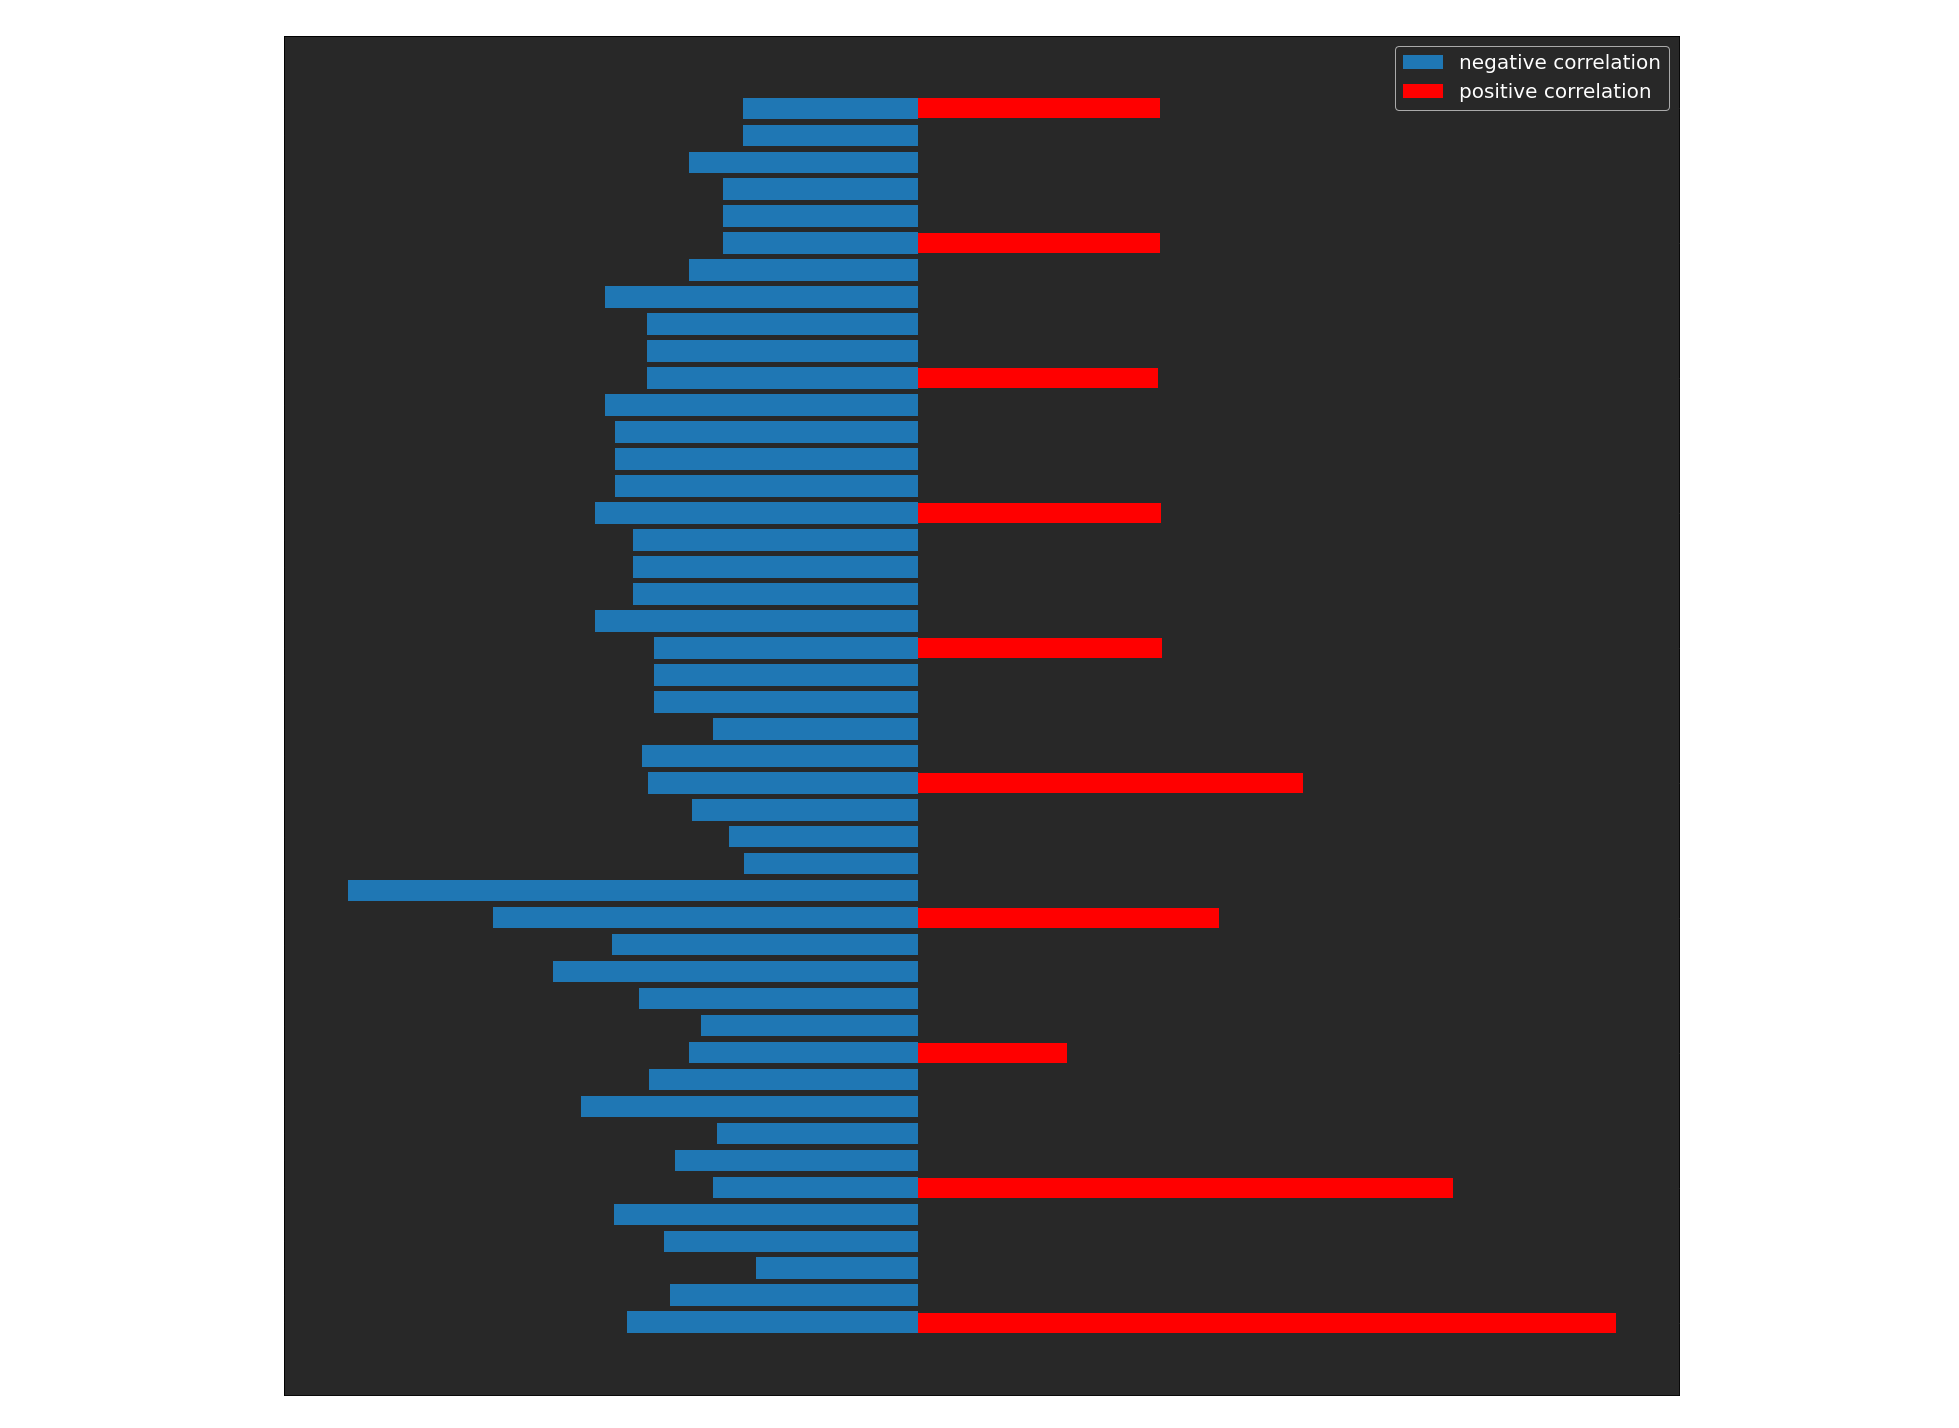

In [16]:
h = (corr['height_cm']<=-0.2)
figure, ax1 = plt.subplots(1)
ax1.figure.set_size_inches(25, 25)
ax1.barh(corr['height_cm'][corr['height_cm'].where(h).notnull()].index, corr['height_cm'][corr['height_cm'].where(h).notnull()],
        label='negative correlation')

h = (corr['height_cm']>=0.2)
ax2 = plt.twinx()
ax2.barh(corr['height_cm'][corr['height_cm'].where(h).notnull()].index, corr['height_cm'][corr['height_cm'].where(h).notnull()],
         color='red', height=0.15, label='positive correlation')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0, prop={'size': 20})
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.title('Correlation with Height', fontsize=30)

plt.xticks(rotation = 90)
plt.show()

## Inferential Statistics

<BarContainer object of 15465 artists>

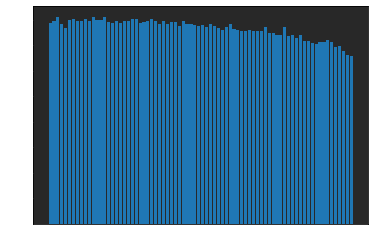

In [17]:
Df = processed_df.fillna(0)
plt.bar(Df['movement_balance_0'], Df['height_cm'])

### Scaling

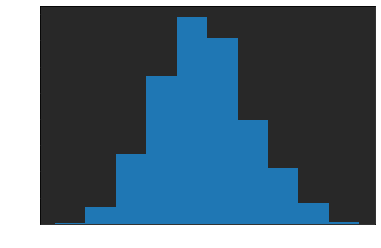

In [18]:
from sklearn.preprocessing import MinMaxScaler
height = Df['height_cm'].values
mbal = Df['movement_balance_0'].values
l = height.shape[0]
assert(l==mbal.shape[0])


height = np.expand_dims(height, axis=1)
mbal = np.expand_dims(mbal, axis=1)
min_max_scaler = MinMaxScaler()

height = min_max_scaler.fit_transform(height)
height /= np.mean(height)
height=np.squeeze(height)

mbal = MinMaxScaler().fit_transform(mbal)
mbal=np.squeeze(mbal)
mbal /= np.mean(mbal)

X = height - mbal
plt.hist(X)

plt.show()

### Sampling

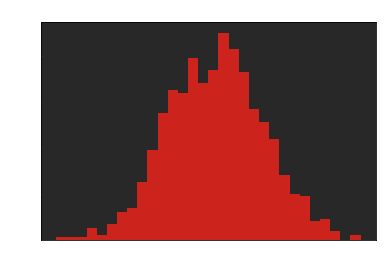

In [19]:
from random import sample

Y = list(X)
n_samples = 1000
sample_size = int(0.05*len(X))

p =[]

for n_sample in range(n_samples):
    m = np.mean(sample(Y, sample_size))
    p.append(m)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.hist(p, bins=30,color=my_palette['secondary_color'])
plt.gca().set(title='Mean histogram', ylabel='Frequency', xlabel='mean')
plt.show()

### Z statistic

In [20]:
from scipy.stats import norm
from math import erf, sqrt

s = np.std(X)
se = s/sqrt(n_samples)
print(f'standard deviation: {s} standard error: {se}')
m = np.mean(p)
z_star = x = norm.ppf(0.025)
print(f'z val :{z_star} 95% confidence interval ({m+z_star*se}, {m-z_star*se})')
print('0 lies in the range of confidence interval')

standard deviation: 0.5344041913000007 standard error: 0.016899344356483412
z val :-1.9599639845400545 95% confidence interval (-0.03434415079364187, 0.031900061808453554)
0 lies in the range of confidence interval


## Regression

In [21]:
from sklearn import linear_model